In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection

In [134]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']
print(np.shape(X), np.shape(Y))

(1797, 64) (1797,)


In [135]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [136]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
clf = sklearn.neural_network.MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5, 
                                           hidden_layer_sizes=(5), random_state=1, max_iter=1000)

In [185]:
clf.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [186]:
clf.loss_

0.05873324322549719

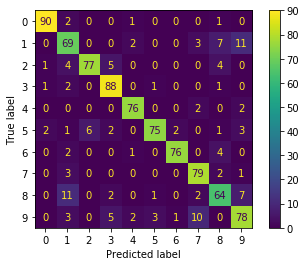

In [187]:
sklearn.metrics.plot_confusion_matrix(clf, X_test, Y_test)

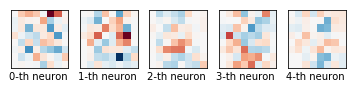

In [189]:
scale = np.abs(clf.coefs_[0][:,:]).max() # el cero selecciona la primera capa oculta

for i in range(5):
    l1_plot = plt.subplot(1, 5, i + 1)
    l1_plot.imshow(clf.coefs_[0][:,i].reshape(8,8), interpolation='nearest',cmap=plt.cm.RdBu, 
                   vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('%i-th neuron ' % i)

In [207]:
n_hidden = np.arange(20)+1
loss = np.ones(len(n_hidden))
f1 = np.ones(len(n_hidden))

for i,n in enumerate(n_hidden):
    print(n)
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5, 
                                           hidden_layer_sizes=(n), random_state=1, max_iter=200)
    mlp.fit(X_train, Y_train)
    loss[i] = mlp.loss_
    f1[i] = sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro')

1
2


/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3
4


/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status

5
6


/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


7
8
9
10
11
12
13
14
15
16
17
18
19
20


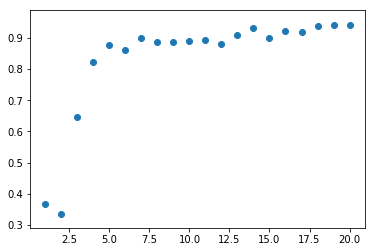

In [208]:
plt.scatter(n_hidden, f1)

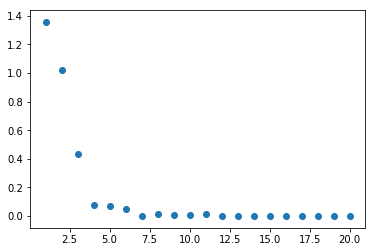

In [209]:
plt.scatter(n_hidden, loss)

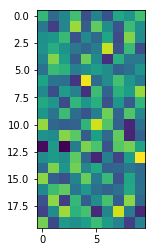

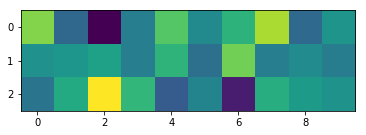

In [111]:
plt.imshow(clf.coefs_[2])

array([[ 4.29324058e+01, -2.61721215e+01, -7.40535717e+01,
        -1.27744039e+01,  3.17518411e+01, -6.20829920e+00,
         1.88274418e+01,  5.12570565e+01, -2.51080376e+01,
        -5.18067038e-02],
       [-1.38178213e+00,  1.06087569e+00,  8.07552242e+00,
        -1.29154228e+01,  1.90568114e+01, -2.08279083e+01,
         3.87538224e+01, -1.29178760e+01, -4.79571694e+00,
        -1.36443547e+01],
       [-1.87259652e+01,  1.37915376e+01,  6.94228086e+01,
         2.11027715e+01, -3.21701975e+01, -9.46805196e+00,
        -6.26319779e+01,  1.54016381e+01,  4.12698113e+00,
        -9.29789121e-01]])